In [128]:
# from mpl_toolkits.mplot3d import Axes3D
from mpld3 import plugins
import mpld3
import sys
import os
sys.path.append(os.path.abspath('..'))
tfmat_path=os.path.abspath('../../CA_tfmat');
print(tfmat_path)                           

from mpld3 import utils
from utils import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
mpld3.enable_notebook()
from IPython.display import HTML
src='<script src="https://cdn.jsdelivr.net/clipboard.js/1.6.0/clipboard.js"></script>'
HTML(src)

/home/shouldsee/Documents/repos/CA_tfmat


In [100]:
%%javascript
// require.config({
//   paths: {
//       Clipboard:'//cdn.jsdelivr.net/clipboard.js/1.6.0/clipboard.min.js'
// //       d3: '//cdnjs.cloudflare.com/ajax/libs/d3/3.4.8/d3.min'
//   }
// });
// var txt='1'
new Clipboard('.btn', {
                            text: function(trigger) {
                                return txt;
                            }
                        });

<IPython.core.display.Javascript object>

In [103]:

class ClickInfo(plugins.PluginBase):
    """Plugin for getting info on click"""
    
    JAVASCRIPT = """
    mpld3.register_plugin("clickinfo", ClickInfo);
    ClickInfo.prototype = Object.create(mpld3.Plugin.prototype);
    ClickInfo.prototype.constructor = ClickInfo;
    ClickInfo.prototype.requiredProps = ["id","labels"];
    function ClickInfo(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };
    
    ClickInfo.prototype.draw = function(){
        var obj = mpld3.get_element(this.props.id);
        var labels = (this.props.labels);
        obj.elements().on("mousedown",
                          function(d, i){
                          txt=labels[i];
                          window.prompt("Copy to clipboard: Ctrl+C, Enter", txt);
                          
                          
                          });
    }
    """
    
#     obj.elements().on("mousedown",
#                           function(d, i){alert("clicked on points[" + labels[i] + "]");});
    def __init__(self, points,labels=None):
        self.dict_ = {"type": "clickinfo",
                      "id": utils.get_id(points),
                     "labels":labels};



In [166]:
# log=readcsv('log.csv',header=['1','2','3','4','5'])
import csv
# data=[[]]*5;
def csv2dat(fname):
    dat=[];
    with open(fname, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter='\t', quotechar='|')
        for row in (spamreader):
            dat+=[row];

    return np.array(dat);
    
# dat[0:5,:]

In [51]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

/home/shouldsee/.local/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


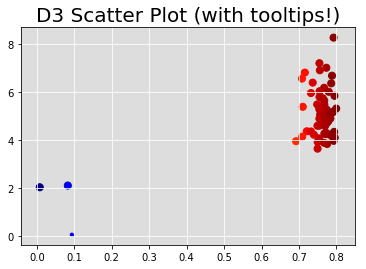

In [234]:
# fig=plt.figure(figsize=[10,5])
# ax=plt.subplot(axisbg='#DDDDDD',)
dat=csv2dat(tfmat_path+'/log8.csv')
# dat=csv2dat(tfmat_path+'/tst6.csv')

# dat=np.vstack((dat,csv2dat(tfmat_path+'/tst1.csv')))
n0=0;
data=dat[n0:n0+100,:]

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#DDDDDD',))
# fig.set_size_inches([10,8])
ax.grid(color='white', linestyle='solid')
# plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.5)


xs=data[:,0];
ys=(data[:,1].astype(np.float));
ys=np.log(ys);
sizs=list(float(x)/2 for x in data[:,2])
N = xs.size;
labels=list(data[:,3]);
scatter = ax.scatter(xs,
                     ys,
                     c=list( 1.*float(i)/N for i in xs),
                     s = sizs,
                     alpha=1.0,
#                      label=labels,
                     cmap=plt.cm.jet)

ax.set_title("D3 Scatter Plot (with tooltips!)", size=20)
# labels = ['point {0}'.format(i + 1) for i in range(N)]
tooltip = plugins.PointLabelTooltip(scatter, labels)
plugins.connect(fig, 
                tooltip,
                plugins.Zoom(enabled=True),
                ClickInfo(scatter,labels)
               )
# plugins.connect(fig,
#                )


In [232]:
# dat[146,:];
dat.shape
# len(labels)

(11, 5)